# TEXT ANALYSIS ON WEB SCRAPED MOVIE SCREENPLAYS

In [1]:
from collections import Counter

import glob
import os
import shutil
import random

import plotly.graph_objects as go
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# plotly
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px


from bs4 import  BeautifulSoup, SoupStrainer
import httplib2
import pprint
import re

import traceback

In [ ]:
#Extract the film script URL LIst

In [167]:
def get_url_list(genre):
    http = httplib2.Http()
    status, response = http.request('https://imsdb.com/genre/' + genre)
    url_list = []
    for link in BeautifulSoup(response, parse_only= SoupStrainer('a')):
        if link.has_attr('href'):
            url_in = link['href']
            if '/Movie Scripts/' in url_in:
                if link.has_attr('title'):
                    url_in = link['title']
                    url_in = url_in.replace(' ', '-')
                    url_in = re.sub(r'\:', '', url_in)
                    url_in = re.sub(r'-Script', '', url_in)
                    url_in = 'http://www.imsdb.com/scripts/' + url_in + '.html'
                    url_list.append(url_in)
                    print(url_in)
                    
    return url_list

def get_movie_script(url_list, genre):
    
    script_list =[]
    http = httplib2.Http()
    film_list= url_list
    print(len(film_list))
    num_movies = 0
    files = {}
    for index in range(len(film_list)):
        film_name  = film_list[index].strip('http://www.imsdb.com/scripts/')
        film_name = film_name.replace('.html','')
        film_name = film_name.replace(':', '')
        film_name = film_name.replace('?', '')
        film_name = film_name.replace('-', '')
        # special_char =  spe['&', ' ?',  '<', '>', '#', '{' ,  '}', '%', '~', '/', '\\' , '.']
            
 #       print(film_name)
        status, response = http.request(film_list[index])
        
        filename = genre + '/'+film_name+'.txt'
        
        files[film_name] = filename
        
        for link in BeautifulSoup(response, parse_only= SoupStrainer('pre')):
            num_movies = num_movies + 1
            #print(num_movies)
            script_list = link.text
            #print("hello")
            
    
            with open(filename, "w", encoding='utf-8', errors='ignore') as f:
                    #print("in loop")
                for s in script_list:
                    f.write(s)
                    
    return files 

def clean_text(filename):
    """
    Applies some pre-processing on the given text.
    """
    with open(filename, "r", encoding='utf-8', errors='ignore') as r:
        text = [row for row in r]
        
    #REMOVE TRANSITIONS OR CAMERA ANGLES
    transitions = ['SMASH CUT TO:', 'FINAL SHOOTING SCRIPT', 'CUT TO BLACK', 'SMASH TO:', 'RAPID CUT TO:', 'BACK TO:', 'BLACK SCREEN', 'FADE OUT TO WHITE LIGHT', 'CUT TO:', 'CUT BACK:', 'CUT BACK', 'DISSOLVE TO:', 'CONTINUED', 'RAPID CUT', 'RAPID CUT TO', 'FADE TO:', \
                   'FADE IN:', 'FADES TO BLACK', 'FADE TO', 'CUT TO', 'FADE UP:', 'BEAT', 'AFTERNOON', 'EVENING', 'CONTINUED:', 'FADE IN', \
                   'TO:', 'CLOSE-UP','WIDE ANGLE','CONTINUED:', 'TITLE:', 'FADE IN','DISSOLVE TO','CUT-TO','CUT TO', 'CUT TO BLACK',\
                   'INTERCUT', 'INSERT', 'CLOSE UP', 'TITLE CARD', 'PAUSE', 'SOUND', 'SONG CONTINUES OVER', 'BACK TO SCENE',\
                   'CUT', 'WATCH', 'CU WATCH', 'BLACK', 'BACK IN SILENCE', 'SUBTITLE:', 'CLOSE', 'ON THE ROOF','CUT HARD TO:',\
                   'THE SCREEN', 'TITLE', 'PROLOGUE', 'SPLITSCREEN.', 'OMITTED', 'BLACK.',\
                   'FADE OUT:', 'FADE OUT.', 'FADE OUT', 'DISSOLVE', 'NEW ANGLE', 'WIDE SHOT']
    # remove directors or the film production company
    best_ = ['BEST DIRECTOR', 'BEST ADAPTED SCREENPLAY', 'SENTENCE', 'BROADCASTING STATUS', 'BEST COSTUME DESIGN', 'TWENTIETH CENTURY FOX', 'BEST ORIGINAL SCORE', 'BEST ACTOR', 'BEST SUPPORTING ACTOR', 'BEST CINEMATOGRAPHY', 'BEST PRODUCTION DESIGN', 'BEST FILM EDITING', 'BEST SOUND MIXING', 'BEST SOUND EDITING', 'BEST VISUAL EFFECTS']
    #text = re.sub('\d+', '', text)
    tex = []
    for x in text:
        tx = x.replace('\t', ' ').lstrip(" ")
        tx = re.sub(r'^\d+\n', r'', tx)
        tx = re.sub(r'\(.*\)', r'', tx)
        tx = re.sub(r'\#\d+', r'', tx)
        #tx = tx.replace('\n', '')
        #tx = re.sub(r'\d+', r'', tx)
        tx = re.sub(r'(((INT\.|EXT\.)\s[A-Z]+.*)|((INT\.|EXT\.)\s+[A-Z]+.*)|((INT\.|EXT\.)\s[A-Z]+)|((INT\.|EXT\.)\s[0-9]+.*)|\
        ((INT\./EXT\.|EXT\./INT\.)\s[A-Z]+.*)|((INT\.|EXT\.)\s[0-9]+)|((INT\./EXT\.|EXT\./INT\.)\s[0-9]+.*)|(INT\.\s+.*|EXT\.\s+.*)\
        |((INT\.|EXT\.)\s+[A-Z]+\W+.+)|((INT|EXT)\s+[A-Z]+.*)|((INT|EXT)\s+[A-Z]+.*)|((INT|EXT)\s[A-Z]+)|((INT|EXT)\s[0-9]+.*)|\
        ((INT/EXT|EXT/INT)\s+[A-Z]+.*)|((INT|EXT)\s+[0-9]+)|((INT/EXT|EXT/INT)\s+[0-9]+.*)|((I/E\.|E/I\.)\s+[A-Z].*)\
        |((INT|EXT)\s+[A-Z]+\W+.+)|((I/E\.|E/I\.)\s+.*))', 'SCC', tx)
        tx = re.sub(r'(^\d+\w+\.\s\n)|(^\d+\.\s\n)|(^\d+\.\n)', r'', tx)
        tx = re.sub(r'^\W+', r'', tx)
        tx = re.sub(r'^\d+\.', r'', tx)
        tx = re.sub(r'^\d+/\d+/\d+', r'', tx)
        tx = re.sub(r'ANGLE.*', '', tx)
        tx = re.sub(r'(\'m|\’m)', r' am', tx)
        tx = re.sub(r'(\'ll|\’l)', r' will', tx)
        tx = re.sub(r'(\'re|\’re)', r' are', tx)
        tx = re.sub(r'(\'d|\’d)', r' had', tx)
        tx = re.sub(r'(\'ve|\’ve)', r' have', tx)
        tx = re.sub(r'SEQ\.\s+\d+', r'', tx)
        #tx = re.sub(r'Final\s+\d+\.', r'', tx)
        tx = re.sub(r'Goldenrod\s+\-\s+\d+\.\d+\.\d+\s+\d+\.', r'', tx)
        tx = re.sub(r'(^\d+\s+\d+\s+\d+\s+\-\sRev\.\s\d+/\d+/\d+\s+\d+[A-Z])|(^\d+\s+\d+\s+\d+\s+\-\sRev\.\s\d+/\d+/\d+\s+\d+)', '', tx)
        tx = re.sub(r'([A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+\.)|([A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+[A-Z]\.)|(DBL\.\s[A-Z]+[A-Z]+\sREV\s\d+\-\d+\-\d+\s\d+\.)', '', tx)
        #tx = re.sub(r'^TITLE:\n', '', tx)
        #end = re.compile(r'THE END.*|FADE OUT.*', re.MULTILINE)
        #tx = end.sub(r'', tx)
        trans = re.compile("({})+".format("|".join(re.escape(c) for c in transitions)))
        tx = trans.sub(r'', tx)
        #tx = re.sub(r'[A-Z]+\'S', '', tx)
        #tx = tx.replace('[^a-zA-Z]', '')
        #tx = tx.replace('', '')
        #tx = tx.strip()
        #tx = re.sub(r'\d+', r'', tx)
        tx = re.sub(r"[^a-zA-Z0-9.,?'&\n ]+", '', tx)
        #tx = re.sub(r'\W+', ' ', tx)
        tex.append(tx)
    txt = "".join([s for s in tex if s.strip()])
    txt = re.sub(r'\nTHE END\n(.|\n)*', '', txt)
    
    return txt

def scene_wise_dataframe(filename, genre):
    
    df_res = pd.DataFrame(columns=['Scene', 'Genre']) 
    
        
    try:
        clean_text_animation = clean_text(filename)
            
        x = clean_text_animation.split("SCC")
            
        df_res["Scene"] = x
        
            
    except:
        traceback.print_exc()
        
    df_res["Genre"] = genre
    return df_res 

In [68]:
url_action = get_url_list("Action")
url_romance = get_url_list("Romance")
url_animation = get_url_list("Animation")

files_action = get_movie_script(url_action[:40], "Action")
files_romance = get_movie_script(url_romance[:40], "Romance")
files_animation = get_movie_script(url_animation[:40], "Animation")


http://www.imsdb.com/scripts/15-Minutes.html
http://www.imsdb.com/scripts/2012.html
http://www.imsdb.com/scripts/30-Minutes-or-Less.html
http://www.imsdb.com/scripts/48-Hrs..html
http://www.imsdb.com/scripts/A-Most-Violent-Year.html
http://www.imsdb.com/scripts/Above-the-Law.html
http://www.imsdb.com/scripts/Abyss,-The.html
http://www.imsdb.com/scripts/Air-Force-One.html
http://www.imsdb.com/scripts/Alien.html
http://www.imsdb.com/scripts/Alien-3.html
http://www.imsdb.com/scripts/Alien-vs.-Predator.html
http://www.imsdb.com/scripts/Alien-Resurrection.html
http://www.imsdb.com/scripts/Aliens.html
http://www.imsdb.com/scripts/Alone-in-the-Dark.html
http://www.imsdb.com/scripts/American-Outlaws.html
http://www.imsdb.com/scripts/American-Shaolin-King-of-Kickboxers-II.html
http://www.imsdb.com/scripts/American-Sniper.html
http://www.imsdb.com/scripts/Apocalypse-Now.html
http://www.imsdb.com/scripts/Arctic-Blue.html
http://www.imsdb.com/scripts/Armageddon.html
http://www.imsdb.com/scripts/Ar

40
40


In [69]:
files_action

{'15Minutes': 'Action/15Minutes.txt',
 '2012': 'Action/2012.txt',
 '30MinutesorLess': 'Action/30MinutesorLess.txt',
 '48Hrs.': 'Action/48Hrs..txt',
 'AMostViolentYear': 'Action/AMostViolentYear.txt',
 'AbovetheLaw': 'Action/AbovetheLaw.txt',
 'Abyss,The': 'Action/Abyss,The.txt',
 'AirForceOne': 'Action/AirForceOne.txt',
 'Alien': 'Action/Alien.txt',
 'Alien3': 'Action/Alien3.txt',
 'Alienvs.Predator': 'Action/Alienvs.Predator.txt',
 'AlienResurrection': 'Action/AlienResurrection.txt',
 'Aliens': 'Action/Aliens.txt',
 'AloneintheDark': 'Action/AloneintheDark.txt',
 'AmericanOutlaws': 'Action/AmericanOutlaws.txt',
 'AmericanShaolinKingofKickboxersII': 'Action/AmericanShaolinKingofKickboxersII.txt',
 'AmericanSniper': 'Action/AmericanSniper.txt',
 'ApocalypseNow': 'Action/ApocalypseNow.txt',
 'ArcticBlue': 'Action/ArcticBlue.txt',
 'Armageddon': 'Action/Armageddon.txt',
 'ArmyofDarkness': 'Action/ArmyofDarkness.txt',
 'Assassins': 'Action/Assassins.txt',
 'AustinPowersInternationalManofMy

In [20]:
df_action = pd.DataFrame(columns=['Scene', 'Genre'])
for i in list(files_action.values()):
    scenes_action = scene_wise_dataframe(i, "Action") 
    df_action = pd.concat([df_action, scenes_action])

In [21]:
df_animation = pd.DataFrame(columns=['Scene', 'Genre'])
for i in list(files_animation.values()):
    scenes_animation = scene_wise_dataframe(i, "Animation") 
    df_animation = pd.concat([df_animation, scenes_animation])

Traceback (most recent call last):
  File "C:\Users\19452\AppData\Local\Temp\ipykernel_62272\398692719.py", line 130, in scene_wise_dataframe
    clean_text_animation = clean_text(filename)
  File "C:\Users\19452\AppData\Local\Temp\ipykernel_62272\398692719.py", line 64, in clean_text
    with open(filename, "r", encoding='utf-8', errors='ignore') as r:
FileNotFoundError: [Errno 2] No such file or directory: 'Animation/Incredibles,The.txt'


In [23]:
df_romance = pd.DataFrame(columns=['Scene', 'Genre'])
for i in list(files_romance.values()):
    scenes_romance = scene_wise_dataframe(i, "Romance") 
    df_romance = pd.concat([df_romance, scenes_romance])

In [25]:
df_new = pd.concat([df_action, df_romance, df_animation], ignore_index = True, sort = False)

In [26]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

##########Encode the data in label


encoder = LabelEncoder()
encoder.fit(df_new["Genre"])
df_new["Encoded_genre"] = encoder.transform(df_new["Genre"])

df_new.isna().any()

df_new.drop('Genre', axis=1, inplace=True)



rows_empty = []

for i in range(0, df_new["Scene"].shape[0]):
    if(df_new["Scene"][i] == ""):
        rows_empty.append(i)
rows_empty

df_new.drop(rows_empty, axis=0, inplace=True)

corpus = []

for i in df_new["Scene"]:
    corpus.append(i)

In [27]:
corpus = [i.replace('\n','') for i in corpus]
len(corpus)

10261

In [34]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=1, max_df=0.8, stop_words=stopwords.words('english'))
processed_sentences_vectors = vectorizer.fit_transform(corpus).toarray()
labels = df_new['Encoded_genre']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_sentences_vectors, labels, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [35]:
y_pred = text_classifier.predict(X_test)

In [36]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 88.07%


In [31]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

In [32]:
y_pred = nb_classifier.predict(X_test)

In [33]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))

Accuracy : 89.77%


In [37]:
from sklearn.svm import SVC
clf = SVC()

# train the classifier using the training set
clf.fit(X_train, y_train)

# make predictions on the test set
y_pred = clf.predict(X_test)

In [38]:
# Calculating Accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
score1 = accuracy_score(y_test, y_pred)
print("Accuracy : {}%".format(round(score1*100,2)))


Accuracy : 91.04%


In [67]:
import pickle

# Save the object to a file
with open('svm_30_Movies.pickle', 'wb') as f:
    pickle.dump(object, f)
    
    

# LDA

In [77]:
# LDA
import gensim
import pyLDAvis
import pyLDAvis.gensim_models
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

C:\Users\19452\anaconda3\lib\site-packages\past\builtins\misc.py:45: DeprecationWarning:

the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses



In [92]:
scenes_lotr1 = scene_wise_dataframe("Action/LordoftheRingsFellowshipoftheRing.txt", "Action") 
scenes_lotr2 = scene_wise_dataframe("Action/LordoftheRingsReturnoftheKing.txt", "Action")
scenes_lotr3 = scene_wise_dataframe("Action/LordoftheRingsTheTwoTowers.txt", "Action")

df_lotr = pd.concat([scenes_lotr1, scenes_lotr2, scenes_lotr3], ignore_index = True, sort = False)

corpus_lotr = []
for i in df_lotr["Scene"]:
    corpus_lotr.append(i)
    
corpus_lotr = [i.replace('\n','') for i in corpus_lotr]
len(corpus_lotr)

340

In [93]:
corpus_lotr[1]

"IMAGE FLICKERING FIRELIGHT. The NOLDORIN FORGE in EREGION.MOLTEN GOLD POURS from the lip of an IRON LADLE.GALADRIEL It began with the forging of the GreatRings.IMAGE THREE RINGS, each set with a single GEM, are receivedby the HIGH ELVESGALADRIEL, GILGALAD and CIRDAN.GALADRIEL Three were given to the Elves, immortal,wisest...fairest of all beings.IMAGE SEVEN RINGS held aloft in triumph by the DWARF LORDS.GALADRIEL Seven to the Dwarf Lords, great minersand craftsmen of the mountain halls.IMAGE NINE RINGS clutched tightly by the KINGS OF MEN...asif holdingclose a precious secret.GALADRIEL And Nine...nine rings were gifted to therace of Men who, above all else, desirepower.GALADRIEL For within these rings was bound thestrength and will to govern each race.GALADRIEL But they were all of them deceived. An ancient PARCHMENT MAP of MIDDLE EARTH...movingslowly across the MAP as if drawn by an unseen force theCAMERA closes in on a PLACE NAME...MORDOR.GALADRIEL for another ring was made.TEASING 

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Us

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning:

ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\Users\19452\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning:

textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.

C:\User

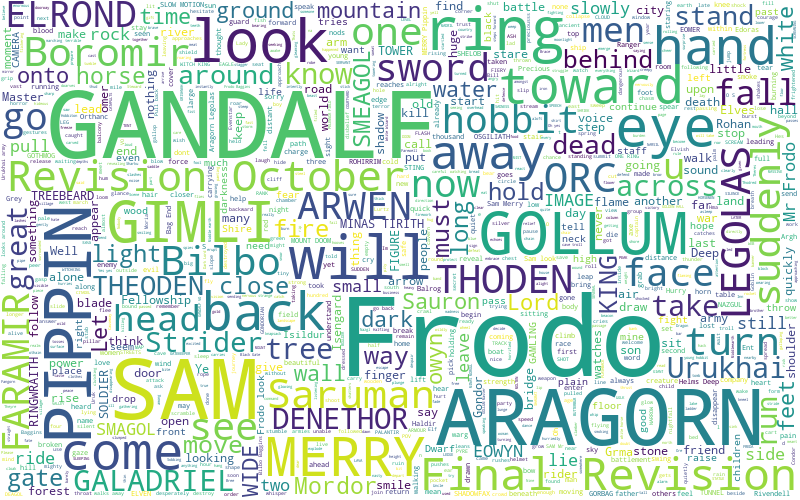

In [200]:
all_words = ''.join([word for word in df_lotr['Scene']]).replace('\n', ' ')
all_words[0:1000]
from wordcloud import WordCloud

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=500, max_font_size=110, background_color="white", max_words=3000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(all_words)

# Visualize the word cloud
wordcloud.to_image()

In [78]:

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [96]:
words_lotr = list(sent_to_words(corpus_lotr))

In [97]:
words_lotr

[['super',
  'new',
  'line',
  'cinema',
  'presentssuper',
  'wingnut',
  'films',
  'production',
  'continues',
  'elvish',
  'singing',
  'woman',
  'voice',
  'iswhispering',
  'tinged',
  'with',
  'sadness',
  'and',
  'regretgaladriel',
  'amar',
  'prestar',
  'sen',
  'han',
  'mathon',
  'ne',
  'nen',
  'han',
  'mathon',
  'ne',
  'chae',
  'han',
  'noston',
  'nedwilith',
  'the',
  'world',
  'is',
  'changed',
  'feel',
  'it',
  'in',
  'thewater',
  'feel',
  'it',
  'in',
  'the',
  'earth',
  'smell',
  'itin',
  'the',
  'air',
  'much',
  'that',
  'once',
  'was',
  'is',
  'lost',
  'for',
  'none',
  'now',
  'live',
  'who',
  'remember',
  'it',
  'super',
  'the',
  'lord',
  'of',
  'the',
  'rings'],
 ['image',
  'flickering',
  'firelight',
  'the',
  'noldorin',
  'forge',
  'in',
  'eregion',
  'molten',
  'gold',
  'pours',
  'from',
  'the',
  'lip',
  'of',
  'an',
  'iron',
  'ladle',
  'galadriel',
  'it',
  'began',
  'with',
  'the',
  'forging

In [98]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(words_lotr, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[words_lotr], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[words_lotr[0]]])

['super', 'new', 'line', 'cinema', 'presentssuper', 'wingnut', 'films', 'production', 'continues', 'elvish', 'singing', 'woman', 'voice', 'iswhispering', 'tinged', 'with', 'sadness', 'and', 'regretgaladriel', 'amar', 'prestar', 'sen', 'han', 'mathon', 'ne', 'nen', 'han', 'mathon', 'ne', 'chae', 'han', 'noston', 'nedwilith', 'the', 'world', 'is', 'changed', 'feel', 'it', 'in', 'thewater', 'feel', 'it', 'in', 'the', 'earth', 'smell', 'itin', 'the', 'air', 'much', 'that', 'once', 'was', 'is', 'lost', 'for', 'none', 'now', 'live', 'who', 'remember', 'it', 'super', 'the', 'lord', 'of', 'the', 'rings']


In [105]:
import spacy as spacy
stop_words=stopwords.words('english')
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [110]:
# Remove Stop Words
words_lotr_nostops = remove_stopwords(words_lotr)

# Form Bigrams
words_lotr_bigrams = make_bigrams(words_lotr_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
lotr_lemmatized = lemmatization(words_lotr_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(lotr_lemmatized[:100])

[['super', 'new', 'line', 'cinema', 'presentssuper', 'wingnut', 'film', 'production', 'continue', 'elvish', 'singing', 'woman', 'voice', 'iswhispere', 'tinge', 'change', 'feel', 'feel', 'earth', 'smell', 'air', 'much', 'lose', 'none', 'live', 'remember', 'super', 'ring'], ['image', 'flicker', 'gold', 'pour', 'iron', 'begin', 'forge', 'greatring', 'image', 'ring', 'set', 'single', 'give', 'elf', 'immortal', 'wisest', 'fair', 'being', 'image', 'ring', 'hold', 'triumph', 'dwarf', 'lord', 'dwarf', 'lord', 'great', 'image', 'ring', 'clutch', 'tightly', 'king', 'man', 'precious', 'ring', 'gift', 'therace', 'man', 'else', 'desirepower', 'ring', 'bind', 'thestrength', 'race', 'deceive', 'ancient', 'parchment', 'map', 'middle', 'earth', 'movingslowly', 'map', 'draw', 'unseen', 'force', 'thecamera', 'close', 'place', 'name', 'ring', 'make', 'teasing', 'shot', 'forge', 'ring', 'chamber', 'fire', 'ofmount', 'dark', 'ring', 'control', 'allother', 'image', 're', 'reflect', 'fiery', 'lava', 'fire', '

In [112]:
# Create Dictionary
id2word = corpora.Dictionary(lotr_lemmatized)

# Create Corpus
texts = lotr_lemmatized

# Term Document Frequency
corpus_lotr_term = [id2word.doc2bow(text) for text in texts]

# View
print(corpus_lotr_term[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 1), (25, 1)]]


In [113]:
id2word[0]

'air'

In [115]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus_lotr_term[:1]]

[[('air', 1),
  ('change', 1),
  ('cinema', 1),
  ('continue', 1),
  ('earth', 1),
  ('elvish', 1),
  ('feel', 2),
  ('film', 1),
  ('iswhispere', 1),
  ('line', 1),
  ('live', 1),
  ('lose', 1),
  ('much', 1),
  ('new', 1),
  ('none', 1),
  ('presentssuper', 1),
  ('production', 1),
  ('remember', 1),
  ('ring', 1),
  ('singing', 1),
  ('smell', 1),
  ('super', 2),
  ('tinge', 1),
  ('voice', 1),
  ('wingnut', 1),
  ('woman', 1)]]

In [116]:
# Building the Topic Model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus_lotr_term,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
# View the topics in LDA model

In [118]:
from pprint import pprint

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus_lotr_term]

[(0,
  '0.030*"crowd" + 0.028*"story" + 0.027*"cheer" + 0.018*"zoom" + '
  '0.016*"alarm" + 0.014*"wagon" + 0.014*"short" + 0.014*"table" + '
  '0.013*"nasty" + 0.012*"big"'),
 (1,
  '0.088*"cave" + 0.030*"kick" + 0.026*"pan" + 0.019*"share" + 0.018*"else" + '
  '0.017*"huddle" + 0.012*"scoop" + 0.011*"lurch" + 0.010*"upthe" + '
  '0.010*"bend"'),
 (2,
  '0.038*"balcony" + 0.011*"cluster" + 0.007*"quietly" + 0.003*"bilbowell" + '
  '0.002*"cap" + 0.002*"lasthomely" + 0.002*"elegant" + 0.002*"elvenbuilding" '
  '+ 0.002*"cookingutensil" + 0.002*"frodopacke"'),
 (3,
  '0.039*"cloud" + 0.038*"brace" + 0.036*"landscape" + 0.033*"plain" + '
  '0.030*"spread" + 0.011*"loss" + 0.003*"nightmarish" + 0.003*"bag_end" + '
  '0.002*"sky" + 0.002*"next"'),
 (4,
  '0.018*"man" + 0.017*"come" + 0.016*"look" + 0.015*"hold" + 0.015*"frodo" + '
  '0.013*"hand" + 0.012*"take" + 0.012*"run" + 0.012*"walk" + 0.012*"turn"'),
 (5,
  '0.065*"plain" + 0.045*"ring" + 0.025*"chain" + 0.023*"lava" + 0.022*"image"

In [119]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus_lotr_term))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=lotr_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -12.462848369653072

Coherence Score:  0.4113049635632863


In [124]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook() 

# Visualize the topics
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus_lotr_term, id2word)
vis

C:\Users\19452\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:246: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.395038 -0.064339       1        1  40.807982
14     0.408199 -0.059207       2        1  28.302101
9      0.332767  0.097907       3        1  14.043893
16    -0.001743  0.282708       4        1   3.433461
5     -0.039047 -0.069293       5        1   2.593201
0     -0.065830 -0.038795       6        1   2.236425
12    -0.040669 -0.018935       7        1   2.196427
6     -0.063693 -0.005219       8        1   1.887476
11    -0.058913  0.054407       9        1   1.728753
1     -0.084956 -0.027207      10        1   0.790887
7     -0.082019 -0.016682      11        1   0.357339
3     -0.083244 -0.024020      12        1   0.331967
13    -0.081257 -0.019061      13        1   0.319492
17    -0.079808 -0.017351      14        1   0.246239
19    -0.081231 -0.018445      15        1   0.213908
2     -0.076647 -0.012998      16        1   0.174693
8     -0.075984 -0.012457      17        1   0.134677
18    -0.074948 -0.011310      18        1   0.106057
10    -0.073615 -0.010333      19        1   0.070549
15    -0.072401 -0.009370      20        1   0.024472, topic_info=         Term        Freq       Total Category  logprob  loglift
2271  aragorn  367.000000  367.000000  Default  30.0000  30.0000
18       ring  152.000000  152.000000  Default  29.0000  29.0000
1880      die   42.000000   42.000000  Default  28.0000  28.0000
202     plain   42.000000   42.000000  Default  27.0000  27.0000
286        go  299.000000  299.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
11       lose    0.001016   43.709354  Topic20  -8.6368  -2.3543
38       army    0.001016   47.887111  Topic20  -8.6368  -2.4456
40       away    0.001016  152.282563  Topic20  -8.6368  -3.6025
56       body    0.001016   26.484972  Topic20  -8.6368  -1.8534
64      child    0.001016   67.396905  Topic20  -8.6368  -2.7874

[935 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
530       3  0.977041   ahead
1278      9  0.771919     aid
1704      8  0.980490     aim
0         1  0.756504     air
0         2  0.252168     air
...     ...       ...     ...
829       4  0.927433    work
829       6  0.077286    work
1974      5  0.978580    yell
1509      4  0.929218  yellow
831       6  1.005788    zoom

[705 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 15, 10, 17, 6, 1, 13, 7, 12, 2, 8, 4, 14, 18, 20, 3, 9, 19, 11, 16])

# PageRank 
To determine the most influential Animated Movies based on script

In [168]:
def add_to_dataFrame(genre, files_dict):
    
    count = 0
    failed_count = 0
    df = pd.DataFrame(columns=['Title', 'Script', 'Genre'])
    for movie in files_dict:
 
        try:
            count=count+1
            
            file_path = files_dict[movie]
            
            clean_script = clean_text(file_path)
            
            df= df.append({'Title': movie, 'Script' : clean_script, 'Genre' : genre}, ignore_index=True)
            print("1")
        except:
            traceback.print_exc()
            failed_count = failed_count + 1
            print("Files Skipped------" + str(failed_count))
            
    return df

In [169]:
url_animation = get_url_list("Animation")
files_animation = get_movie_script(url_animation, "Animation")
num_animation = add_to_dataFrame("Animation", files_animation)

http://www.imsdb.com/scripts/9.html
http://www.imsdb.com/scripts/A-Scanner-Darkly.html
http://www.imsdb.com/scripts/Aladdin.html
http://www.imsdb.com/scripts/Anastasia.html
http://www.imsdb.com/scripts/Antz.html
http://www.imsdb.com/scripts/Beavis-and-Butt-head-Do-America.html
http://www.imsdb.com/scripts/Boxtrolls,-The.html
http://www.imsdb.com/scripts/Cars-2.html
http://www.imsdb.com/scripts/Coco.html
http://www.imsdb.com/scripts/Coraline.html
http://www.imsdb.com/scripts/Croods,-The.html
http://www.imsdb.com/scripts/Despicable-Me-2.html
http://www.imsdb.com/scripts/Fantastic-Mr-Fox.html
http://www.imsdb.com/scripts/Finding-Nemo.html
http://www.imsdb.com/scripts/Frankenweenie.html
http://www.imsdb.com/scripts/Frozen-(Disney).html
http://www.imsdb.com/scripts/Happy-Feet.html
http://www.imsdb.com/scripts/Heavy-Metal.html
http://www.imsdb.com/scripts/How-to-Train-Your-Dragon.html
http://www.imsdb.com/scripts/How-to-Train-Your-Dragon-2.html
http://www.imsdb.com/scripts/Incredibles,-The.h

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1
1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

Traceback (most recent call last):
  File "C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py", line 13, in add_to_dataFrame
    clean_script = clean_text(file_path)
  File "C:\Users\19452\AppData\Local\Temp\ipykernel_62272\398692719.py", line 64, in clean_text
    with open(filename, "r", encoding='utf-8', errors='ignore') as r:
FileNotFoundError: [Errno 2] No such file or directory: 'Animation/Incredibles,The.txt'


1
Files Skipped------1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1
1
1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1
1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1
1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



1
1
1


C:\Users\19452\AppData\Local\Temp\ipykernel_62272\2057215309.py:15: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [171]:
num_animation

,Title,Script,Genre
0,9,Written by\nPamela Pettler\nShort story by\nSh...,Animation
1,AScannerDarkly,A SCANNER DARKLY\nWritten by\nCharlie Kaufman\...,Animation
2,Aladdin,ALADDIN THE COMPLETE SCRIPT\nCOMPILED BY BEN ...,Animation
3,Anastasia,ANASTASIA\non a wellworn PHOTOGRAPH ALBUM. An ...,Animation
4,Antz,"Antz, unknown draft\nA N T Z\nCHARACTERS ...",Animation
5,BeavisandButtheadDoAmerica,Beavis and ButtHead Do America by Mike Judge ...,Animation
6,"Boxtrolls,The",THE BOXTROLLS\nWritten by\nIrena Brignull & Ad...,Animation
7,Cars2,CARS 2\nWRITTEN BY\nBEN QUEEN\nA sleek British...,Animation
8,Coco,"COCO\nOriginal story by\nLee Unkrich, Jason Ka...",Animation
9,Coraline,CORALINE\nWritten by\nHenry Selick\nBased on t...,Animation


In [172]:
from sentence_transformers import SentenceTransformer
bmodel = SentenceTransformer('all-MiniLM-L6-v2') #384 dims
bert_embeddings_animation = bmodel.encode(num_animation["Script"])

43it [00:00, 2866.10it/s]


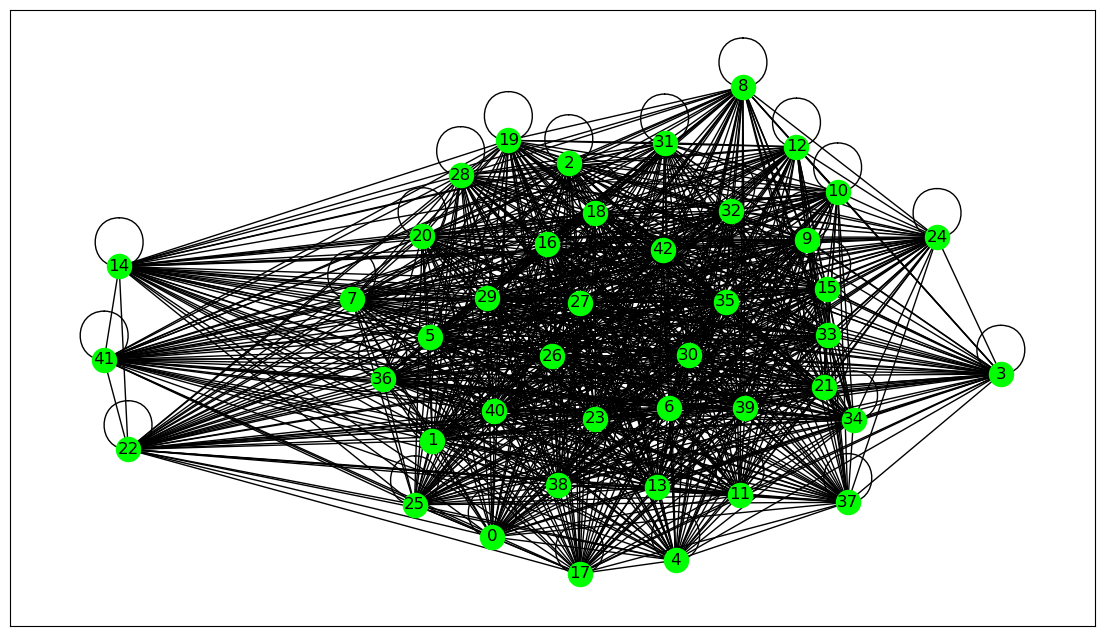

In [175]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer

from tqdm import tqdm

M = np.eye(bert_embeddings_animation.shape[0])

for i,a in tqdm(enumerate(bert_embeddings_animation)):
    for j,b in enumerate(bert_embeddings_animation):
        if i != j:
            M[i,j] = (a @ b.T) / (np.linalg.norm(a)*np.linalg.norm(b))
            
            

#########Get similarity Graph using networkex            
import networkx

similarity_graph = networkx.from_numpy_array(M)
similarity_graph            

#########Plot the graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(14, 8))
networkx.draw_networkx(similarity_graph, node_color='lime')




In [177]:
#########Apply the pageRank algo#####################
scores = networkx.pagerank(similarity_graph)
nx_ranked_animation = sorted(((score, index) for index, score 
                                            in scores.items()), 
                          reverse=True)
nx_ranked_animation[:10]  

for i in range(10):
    print(num_animation["Title"][nx_ranked_animation[i][1]])
    print('----------')

HowtoTrainYourDragon
----------
Boxtrolls,The
----------
Monkeybone
----------
RiseoftheGuardians
----------
HappyFeet
----------
Shrek
----------
WallE
----------
Zootopia
----------
SouthPark
----------
ParaNorman
----------


C:\Users\19452\anaconda3\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:108: DeprecationWarning:

networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.



# Baysian Model

100%|████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 340593.11it/s]


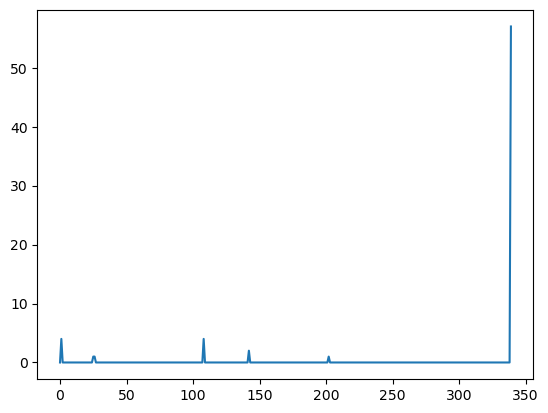

In [182]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in tqdm(paragraphs):
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

##moral_words = ['comforting', 'consoling', 'empathizes', 'sympathize', 'care', 'caregiver', 'empathised', 'hugs', 'heal', 'generous']

hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']

negative_char_occurences = get_any_words_paragraphs(list(df_lotr["Scene"]), negative_charecters)
plt.plot(negative_char_occurences)

100%|█████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 84996.03it/s]


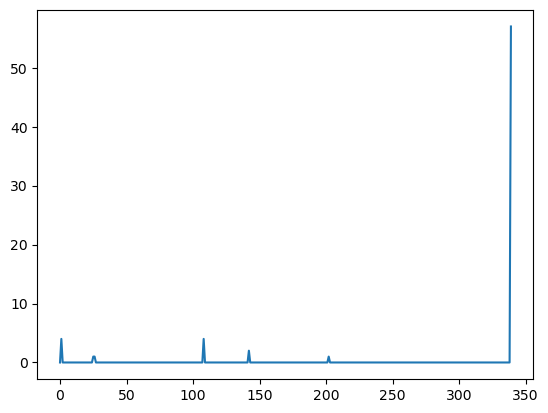

In [184]:
hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']
heroic_occurences = get_any_words_paragraphs(list(df_lotr["Scene"]), hero_characteristics)
plt.plot(negative_char_occurences)

100%|█████████████████████████████████████████████████████████████████████████████| 340/340 [00:00<00:00, 84996.03it/s]


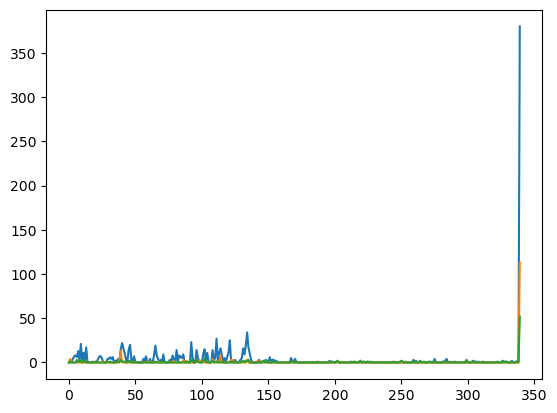

In [187]:
positive_charecters = ["Frodo", "Pippin", "Gandalf", "Merry", 'Aragorn']
negative_charecters = ['Gollum', 'Saruman', 'The King Of The Dead', 'Lurtz', 'Gothmog', 'Balrog']
hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']

pos_chars = get_any_words_paragraphs(list(df_lotr["Scene"]), positive_charecters)
negative_chars = get_any_words_paragraphs(list(df_lotr["Scene"]), negative_charecters)
heroic_occurences = get_any_words_paragraphs(list(df_lotr["Scene"]), hero_characteristics)


plt.plot(pos_chars)
plt.plot(negative_chars)
plt.plot(heroic_occurences)


In [190]:
pos_char_occurences = [bool(v) for v in pos_chars]
negative_char_occurences = [bool(v) for v in negative_chars]
heroic_occurences = [bool(v) for v in heroic_occurences] 


df_heroic = pd.DataFrame(list(zip(pos_char_occurences, negative_char_occurences, heroic_occurences)), columns =['Good', 'Bad', 'Heroic'])
df_heroic.head(10)



,Good,Bad,Heroic
0,False,False,False
1,False,True,True
2,True,False,False
3,True,False,False
4,True,False,False
5,True,False,False
6,True,False,True
7,True,False,True
8,True,False,True
9,True,False,True


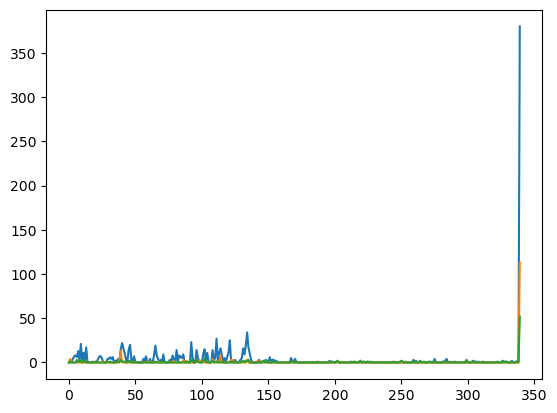

In [203]:
def get_any_words_paragraphs(paragraphs, words):
    
    word_para = []
    for p in paragraphs:
        total = 0
        for w in words:
            total += p.count(w)
        word_para.append(total)
            
    return word_para

positive_charecters = ["Frodo", "Pippin", "Gandalf", "Merry", 'Aragorn']
negative_charecters = ['Gollum', 'Saruman', 'The King Of The Dead', 'Lurtz', 'Gothmog', 'Balrog']
hero_characteristics=['brave','loyal','caring','kind','honest','smart','friend','family','heroic','good','celebrate','happy','hoping','fear','promise','angry','shock']

pos_chars = get_any_words_paragraphs(list(df_lotr["Scene"]), positive_charecters)
negative_chars = get_any_words_paragraphs(list(df_lotr["Scene"]), negative_charecters)
heroic_occurences = get_any_words_paragraphs(list(df_lotr["Scene"]), hero_characteristics)


plt.plot(pos_chars)
plt.plot(negative_chars)
plt.plot(heroic_occurences)

In [204]:
pos_char_occurences = [bool(v) for v in pos_chars]
negative_char_occurences = [bool(v) for v in negative_chars]
heroic_occurences_bool = [bool(v) for v in heroic_occurences] 


df_heroic2 = pd.DataFrame(list(zip(pos_chars , negative_chars, heroic_occurences)), columns =['Good', 'Bad', 'Heroic'])
df_heroic2.head(10)

,Good,Bad,Heroic
0,0,0,0
1,0,4,1
2,1,0,0
3,4,0,0
4,7,0,0
5,8,0,0
6,6,0,3
7,13,0,1
8,2,0,1
9,21,0,2


In [ ]:
import pymc3 as pm
fml = 'Heroic ~ Bad + Good + Bad:Good'
with pm.Model() as model:
    pm.glm.GLM.from_formula(formula=fml, data=df_heroic2, family=pm.glm.families.NegativeBinomial())
    trace = pm.sample(1000, cores=2)